In [85]:
import pandas as pd

# Load the dataset (replace filename with your Titanic file)
df = pd.read_csv("titanic.csv")

# Show first 5 rows
df.head()


,Passengerid,Age,Fare,Sex,sibsp,zero,zero.1,zero.2,zero.3,zero.4,...,zero.12,zero.13,zero.14,Pclass,zero.15,zero.16,Embarked,zero.17,zero.18,2urvived
0,1,22.0,7.2500,0,1,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0
1,2,38.0,71.2833,1,1,0,0,0,0,0,...,0,0,0,1,0,0,0.0,0,0,1
2,3,26.0,7.9250,1,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,1
3,4,35.0,53.1000,1,1,0,0,0,0,0,...,0,0,0,1,0,0,2.0,0,0,1
4,5,35.0,8.0500,0,0,0,0,0,0,0,...,0,0,0,3,0,0,2.0,0,0,0


In [86]:
df.columns

Index(['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'zero', 'zero.1',
       'zero.2', 'zero.3', 'zero.4', 'zero.5', 'zero.6', 'Parch', 'zero.7',
       'zero.8', 'zero.9', 'zero.10', 'zero.11', 'zero.12', 'zero.13',
       'zero.14', 'Pclass', 'zero.15', 'zero.16', 'Embarked', 'zero.17',
       'zero.18', '2urvived'],
      dtype='object')

In [87]:
df_clean = df[['Passengerid', 'Age', 'Fare', 'Sex', 'sibsp', 'Pclass', 'Embarked', '2urvived']]

In [88]:
df_clean.head()

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,2urvived
0,1,22.0,7.2500,0,1,3,2.0,0
1,2,38.0,71.2833,1,1,1,0.0,1
2,3,26.0,7.9250,1,0,3,2.0,1
3,4,35.0,53.1000,1,1,1,2.0,1
4,5,35.0,8.0500,0,0,3,2.0,0


In [89]:
df_clean.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Pclass         0
Embarked       2
2urvived       0
dtype: int64

In [90]:
df_clean.loc[:, 'Embarked'] = df_clean['Embarked'].fillna(df_clean['Embarked'].mode()[0])

In [91]:
# Show if there are still missing values
df_clean.isnull().sum()

Passengerid    0
Age            0
Fare           0
Sex            0
sibsp          0
Pclass         0
Embarked       0
2urvived       0
dtype: int64

In [92]:
# Summary statistics for numeric columns
df_clean.describe()

,Passengerid,Age,Fare,Sex,sibsp,Pclass,Embarked,2urvived
count,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000,1309.000000
mean,655.000000,29.503186,33.281086,0.355997,0.498854,2.294882,1.493506,0.261268
std,378.020061,12.905241,51.741500,0.478997,1.041658,0.837836,0.814244,0.439494
min,1.000000,0.170000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,328.000000,22.000000,7.895800,0.000000,0.000000,2.000000,1.000000,0.000000
50%,655.000000,28.000000,14.454200,0.000000,0.000000,3.000000,2.000000,0.000000
75%,982.000000,35.000000,31.275000,1.000000,1.000000,3.000000,2.000000,1.000000
max,1309.000000,80.000000,512.329200,1.000000,8.000000,3.000000,2.000000,1.000000


In [93]:
# How many males vs females?
df_clean['Sex'].value_counts()

# Passenger class distribution
df_clean['Pclass'].value_counts()

# Survival counts
df_clean['2urvived'].value_counts()


2urvived
0    967
1    342
Name: count, dtype: int64

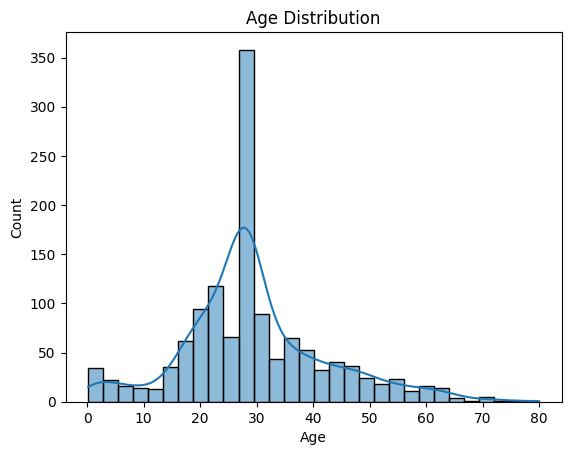

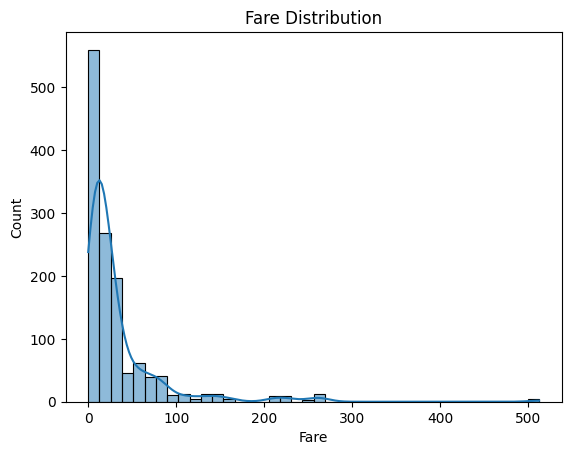

In [94]:
import matplotlib.pyplot as plt
import seaborn as sns

# Age distribution
sns.histplot(df_clean['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

# Fare distribution
sns.histplot(df_clean['Fare'], bins=40, kde=True)
plt.title("Fare Distribution")
plt.show()


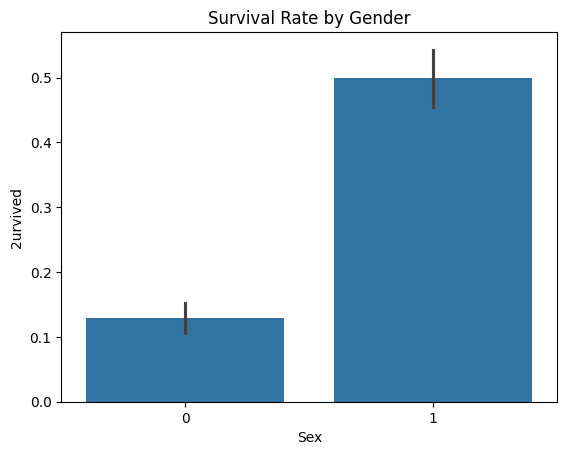

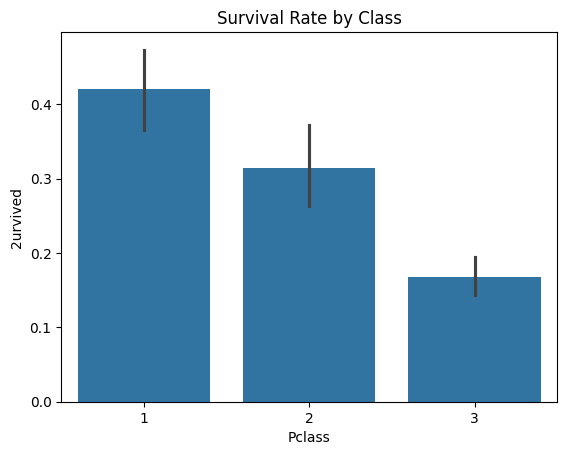

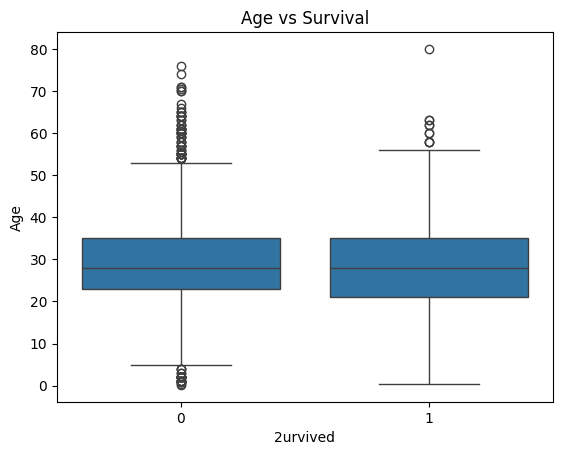

In [95]:
# Survival by gender
sns.barplot(x='Sex', y='2urvived', data=df_clean)
plt.title("Survival Rate by Gender")
plt.show()

# Survival by passenger class
sns.barplot(x='Pclass', y='2urvived', data=df_clean)
plt.title("Survival Rate by Class")
plt.show()

# Age vs Survival
sns.boxplot(x='2urvived', y='Age', data=df_clean)
plt.title("Age vs Survival")
plt.show()

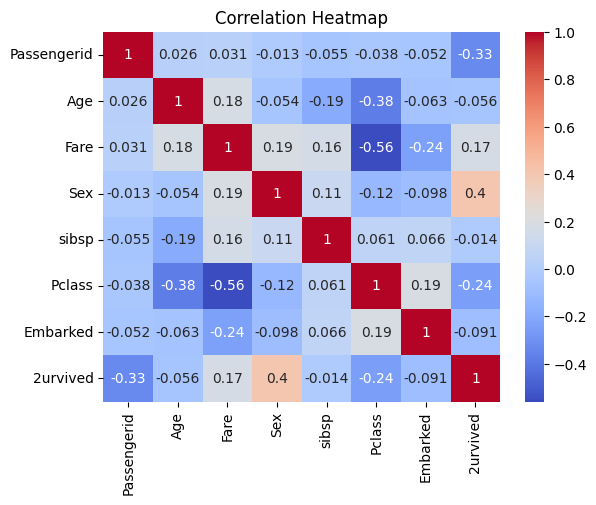

In [96]:
sns.heatmap(df_clean.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()